In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Path to raw data
data_path = 'data/'

In [3]:
def select_keywords_related_files(data_path, key_words):
    filenames = [filename for filename in os.listdir(data_path)]
    environment_filenames = list(filter(lambda filename: any(key_word in filename for key_word in key_words), filenames))
    environment_filepaths = list(map(lambda filename: os.path.join(data_path, filename), environment_filenames))
    return environment_filepaths

In [162]:
populations_df = pd.read_csv('data/Population_E_All_Data_(Normalized).zip', encoding='latin-1')
print(populations_df.Element.unique())
print(populations_df.Item.unique())
populations_df['is_country'] = populations_df['Area Code'].apply(lambda code: len(str(code)) < 4)
populations_df = populations_df[(populations_df.Element == 'Total Population - Both sexes') & (populations_df.is_country)
                               & (populations_df.Year == 2014) & (populations_df.Area != 'China')]
populations_df = populations_df[['Area', 'Value']].sort_values(by='Value', ascending=False)
populations_df = populations_df.rename(columns={'Value': 'Population'})

['Total Population - Both sexes' 'Total Population - Male'
 'Total Population - Female' 'Rural population' 'Urban population']
['Population - Est. & Proj.']


In [163]:
# Select all files which are related to climate change
emissions_paths = select_keywords_related_files(data_path, key_words=['Emissions'])
emissions_paths

['data/Environment_Emissions_intensities_E_All_Data_(Normalized).zip',
 'data/Emissions_Agriculture_Agriculture_total_E_All_Data_(Normalized).zip',
 'data/Environment_Emissions_by_Sector_E_All_Data_(Normalized).zip']

In [172]:
emissions_df = pd.read_csv('data/Environment_Emissions_intensities_E_All_Data_(Normalized).zip', encoding='latin-1')
emissions_df = emissions_df[emissions_df.Area != 'China']
print(emissions_df.Element.unique())
print(emissions_df.Item.unique())
print(emissions_df.Year.max())
print(emissions_df.Unit.unique())
emissions_df[emissions_df.Element == 'Emissions (CO2eq)']

['Emissions intensity' 'Emissions (CO2eq)' 'Production']
['Cereals excluding rice' 'Rice, paddy' 'Meat, cattle'
 'Milk, whole fresh cow' 'Meat, goat' 'Milk, whole fresh goat'
 'Meat, sheep' 'Milk, whole fresh sheep' 'Milk, whole fresh camel'
 'Meat, chicken' 'Eggs, hen, in shell' 'Milk, whole fresh buffalo'
 'Meat, pig' 'Meat, buffalo']
2016
['kg CO2eq/kg product' 'gigagrams' 'tonnes']


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
56,2,Afghanistan,1718,Cereals excluding rice,7231,Emissions (CO2eq),1961,1961,gigagrams,402.2165,Fc
57,2,Afghanistan,1718,Cereals excluding rice,7231,Emissions (CO2eq),1962,1962,gigagrams,408.3269,Fc
58,2,Afghanistan,1718,Cereals excluding rice,7231,Emissions (CO2eq),1963,1963,gigagrams,385.7396,Fc
59,2,Afghanistan,1718,Cereals excluding rice,7231,Emissions (CO2eq),1964,1964,gigagrams,406.7923,Fc
60,2,Afghanistan,1718,Cereals excluding rice,7231,Emissions (CO2eq),1965,1965,gigagrams,410.0940,Fc
...,...,...,...,...,...,...,...,...,...,...,...
376370,5873,OECD,1035,"Meat, pig",7231,Emissions (CO2eq),2012,2012,gigagrams,67724.7956,A
376371,5873,OECD,1035,"Meat, pig",7231,Emissions (CO2eq),2013,2013,gigagrams,66945.8132,A
376372,5873,OECD,1035,"Meat, pig",7231,Emissions (CO2eq),2014,2014,gigagrams,69130.9316,A
376373,5873,OECD,1035,"Meat, pig",7231,Emissions (CO2eq),2015,2015,gigagrams,70005.9504,A


In [174]:
emissions_df['is_country'] = emissions_df['Area Code'].apply(lambda code: len(str(code)) < 4)
emissions_country = emissions_df[(emissions_df.Element == 'Emissions (CO2eq)') & (emissions_df.is_country)]
emissions_country_total = emissions_country[emissions_country.Year == 2014][['Area', 'Value']]\
    .groupby('Area', as_index=False).agg('sum').sort_values(by='Value', ascending=False)
emissions_country_total.rename(columns={'Area': 'Country', 'Value': 'Emissions (CO2eq) [gigagrams]'})

,Country,Emissions (CO2eq) [gigagrams]
41,"China, mainland",575316.9288
90,India,550253.5783
24,Brazil,407380.3308
205,United States of America,303450.8525
145,Pakistan,136862.3354
...,...,...
132,Nauru,1.2146
192,Tokelau,0.4189
117,Maldives,0.3593
163,Saint Pierre and Miquelon,0.1673


In [175]:
emissions_intensities_2014_df = emissions_df[(emissions_df.Year == 2014) & (emissions_df.Element == 'Emissions intensity') 
                                       & (emissions_df.is_country)][['Area', 'Item', 'Value']]\
                                        .drop_duplicates().rename(columns={'Area': 'Reporter Countries'})\
                                        .rename(columns={'Value': 'Emissions intensity'}).set_index(['Reporter Countries', 'Item'])
emissions_intensities_2014_df.rename(columns={'Emissions intensity': 'Emissions intensits [kg CO2eq/kg product]'})

Emissions intensits [kg CO2eq/kg product]
Reporter Countries Item                                                             
Afghanistan        Cereals excluding rice                                     0.1206
                   Rice, paddy                                                1.3897
                   Meat, cattle                                               7.6995
                   Milk, whole fresh cow                                      4.7642
                   Meat, goat                                                22.2996
...                                                                              ...
Zimbabwe           Meat, goat                                                37.0819
                   Meat, sheep                                              153.9554
                   Meat, chicken                                              0.7227
                   Eggs, hen, in shell                                        1.3571
                   Meat, pig                                                  3.1629

[1942 rows x 1 columns]

In [193]:
trade_df = pd.read_csv('data/Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip', encoding='latin-1')

In [197]:
trade_df[trade_df.Element == 'Export Quantity'].sort_values(by='Value', ascending=False)

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
7103403,44,Colombia,231,United States of America,1293,Crude materials,5910,Export Quantity,2004,2004,tonnes,2.579549e+09,NaN
17908376,114,Kenya,54,Denmark,1171,Animals live nes,5908,Export Quantity,2007,2007,Head,7.201161e+08,NaN
17952927,114,Kenya,150,Netherlands,1293,Crude materials,5910,Export Quantity,2007,2007,tonnes,5.942902e+08,NaN
17952926,114,Kenya,150,Netherlands,1293,Crude materials,5910,Export Quantity,2006,2006,tonnes,5.710070e+08,NaN
17978253,114,Kenya,202,South Africa,1171,Animals live nes,5908,Export Quantity,2007,2007,Head,5.465069e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18504301,121,Lebanon,46,Congo,231,Almonds shelled,5910,Export Quantity,2013,2013,tonnes,0.000000e+00,NaN
18504303,121,Lebanon,46,Congo,231,Almonds shelled,5910,Export Quantity,2015,2015,tonnes,0.000000e+00,NaN
6664031,214,"China, Taiwan Province of",33,Canada,656,"Coffee, green",5910,Export Quantity,2014,2014,tonnes,0.000000e+00,NaN
29265905,203,Spain,131,Malaysia,659,"Coffee, extracts",5910,Export Quantity,1991,1991,tonnes,0.000000e+00,NaN


In [181]:
import_export_df = pd.read_csv('D3/import_export_all_df_2014.csv').set_index(['Reporter Countries', 'Item'])
emissions_import_export = import_export_df.merge(emissions_2014_items_df, how='inner', left_index=True, right_index=True)
emissions_import_export['Emissions (CO2eq) [gigagrams]'] = emissions_import_export['Value'] / 1000 * emissions_import_export['Emissions intensity'] 
emissions_import_export = emissions_import_export.reset_index()
emissions_export = emissions_import_export[['Reporter Countries', 'Emissions (CO2eq) [gigagrams]']]\
    .groupby('Reporter Countries').agg('sum').rename(columns={'Emissions (CO2eq) [gigagrams]': 'Out Emissions (CO2eq) [gigagrams]'})
emissions_import = emissions_import_export[['Partner Countries', 'Emissions (CO2eq) [gigagrams]']]\
    .groupby('Partner Countries').agg('sum').rename(columns={'Emissions (CO2eq) [gigagrams]': 'In Emissions (CO2eq) [gigagrams]'})

In [185]:
emissions_import_export.sort_values(by='Value', ascending=False).head(50)

,Reporter Countries,Item,Partner Countries,Value,Year,Emissions intensity,Emissions (CO2eq) [gigagrams]
63872,United States of America,Cereals excluding rice,Japan,12584299.0,2014,0.2001,2518.118230
31612,Japan,Cereals excluding rice,United States of America,12572263.0,2014,0.2093,2631.374646
37066,Mexico,Cereals excluding rice,United States of America,10401943.0,2014,0.2033,2114.715012
63932,United States of America,Cereals excluding rice,Mexico,10396578.0,2014,0.2001,2080.355258
46714,Republic of Korea,Cereals excluding rice,United States of America,5376990.0,2014,0.5162,2775.602238
7000,Brazil,Cereals excluding rice,Iran (Islamic Republic of),4698583.0,2014,0.1904,894.610203
262,Algeria,Cereals excluding rice,France,4686502.0,2014,0.1023,479.429155
64074,United States of America,Cereals excluding rice,Republic of Korea,4624869.0,2014,0.2001,925.436287
18788,France,Cereals excluding rice,Algeria,4553226.0,2014,0.1160,528.174216
48810,Russian Federation,Cereals excluding rice,Turkey,4405898.0,2014,0.1299,572.326150


In [182]:
emissions_country_io = emissions_country_total.merge(emissions_export, how='left', left_on='Area', right_on='Reporter Countries')
emissions_country_io = emissions_country_io.merge(emissions_import, how='left', left_on='Area', right_on='Partner Countries')
emissions_country_io.fillna(value=0.0, inplace=True)
emissions_country_io['Normalized Emissions [gigagrams]'] = emissions_country_io['Value'] - \
    emissions_country_io['Out Emissions (CO2eq) [gigagrams]'] + emissions_country_io['In Emissions (CO2eq) [gigagrams]']
emissions_country_io.sort_values(by='Normalized Emissions [gigagrams]', ascending=False)

,Area,Value,Out Emissions (CO2eq) [gigagrams],In Emissions (CO2eq) [gigagrams],Normalized Emissions [gigagrams]
14,Thailand,60627.5394,2.736835e+04,5.927976e+07,5.931302e+07
16,Viet Nam,59054.2139,0.000000e+00,3.670205e+07,3.676111e+07
0,"China, mainland",575316.9288,3.072218e+04,8.148038e+06,8.692632e+06
209,"China, Macao SAR",3.2080,7.572372e+01,4.043354e+06,4.043281e+06
7,Australia,96156.9822,1.130665e+05,2.434061e+06,2.417151e+06
...,...,...,...,...,...
62,Algeria,10504.5458,4.294761e+04,3.927468e+03,-2.851559e+04
151,Jamaica,514.3168,5.000790e+04,7.499860e+02,-4.874360e+04
31,South Africa,26696.0520,9.945678e+04,8.541600e+03,-6.421912e+04
127,United Arab Emirates,1508.8755,9.646880e+04,2.578230e+04,-6.917762e+04


In [120]:
emissions_normalized = emissions_country_total.merge(populations_df, how='inner')
emissions_normalized['Normalized Emissions'] = emissions_normalized.Value / (1000 * emissions_normalized.Population)
emissions_normalized.sort_values(by='Normalized Emissions', ascending=False)

,Area,Value,Population,Normalized Emissions
165,Falkland Islands (Malvinas),140.9004,2.792,5.046576e-02
25,New Zealand,36622.1847,4567.527,8.017946e-03
35,Uruguay,23645.1887,3400.436,6.953576e-03
52,Mongolia,15022.5486,2940.108,5.109523e-03
186,Montserrat,20.8016,4.957,4.196409e-03
...,...,...,...,...
171,Singapore,78.2698,5525.626,1.416487e-05
174,"China, Hong Kong SAR",49.0923,7134.670,6.880809e-06
206,"China, Macao SAR",3.2080,590.208,5.435372e-06
210,Maldives,0.3593,435.015,8.259485e-07


In [18]:
emissions_country = emissions_country[['Area', 'Item', 'Value']].groupby(['Area', 'Item'], as_index=False).agg('mean')
emissions_country = emissions_country.sort_values('Value', ascending=False).groupby(['Area'], as_index=False).first()
emissions_country

,Area,Item,Value
0,Afghanistan,"Milk, whole fresh cow",2904.120664
1,Albania,"Milk, whole fresh cow",1122.009702
2,Algeria,"Meat, sheep",1659.206020
3,American Samoa,"Meat, pig",4.223716
4,Angola,"Meat, cattle",3356.722212
...,...,...,...
220,Western Sahara,"Meat, goat",19.267896
221,Yemen,"Meat, cattle",1163.446271
222,Yugoslav SFR,"Milk, whole fresh cow",9215.473961
223,Zambia,"Meat, cattle",2445.534491


In [19]:
continents_ = ['Africa', 'Asia', 'Americas', 'Europe', 'Oceania']

In [20]:
world_emissions_intensity = emissions_df[(emissions_df.Element == 'Emissions intensity') & (emissions_df.Area == 'World')]
items = world_emissions_intensity.Item.unique().tolist()
meat = list(filter(lambda x: 'Meat' in x, items))
milk = list(filter(lambda x: 'Milk' in x, items))
remaining = list(set(items) - set(meat + milk))

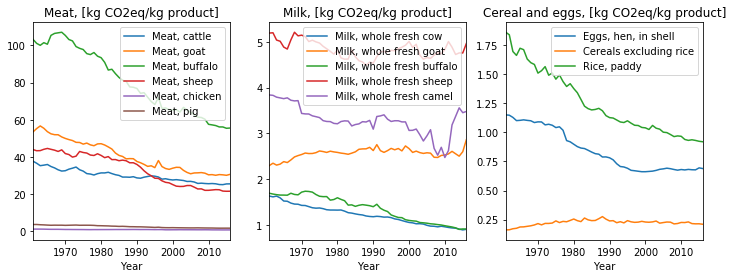

In [21]:
world_emissions_intensity = world_emissions_intensity[['Item', 'Year', 'Value']].groupby(['Item', 'Year'], as_index=False).agg('mean')
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for item in meat:
    world_emissions_intensity[world_emissions_intensity.Item == item].plot(x='Year', y='Value', ax=axes[0], label=item)
    axes[0].legend()
    axes[0].set_title('Meat, [kg CO2eq/kg product]')
for item in milk:
    world_emissions_intensity[world_emissions_intensity.Item == item].plot(x='Year', y='Value', ax=axes[1], label=item)
    axes[1].legend()
    axes[1].set_title('Milk, [kg CO2eq/kg product]')
for item in remaining:
    world_emissions_intensity[world_emissions_intensity.Item == item].plot(x='Year', y='Value', ax=axes[2], label=item)
    axes[2].legend()
    axes[2].set_title('Cereal and eggs, [kg CO2eq/kg product]')

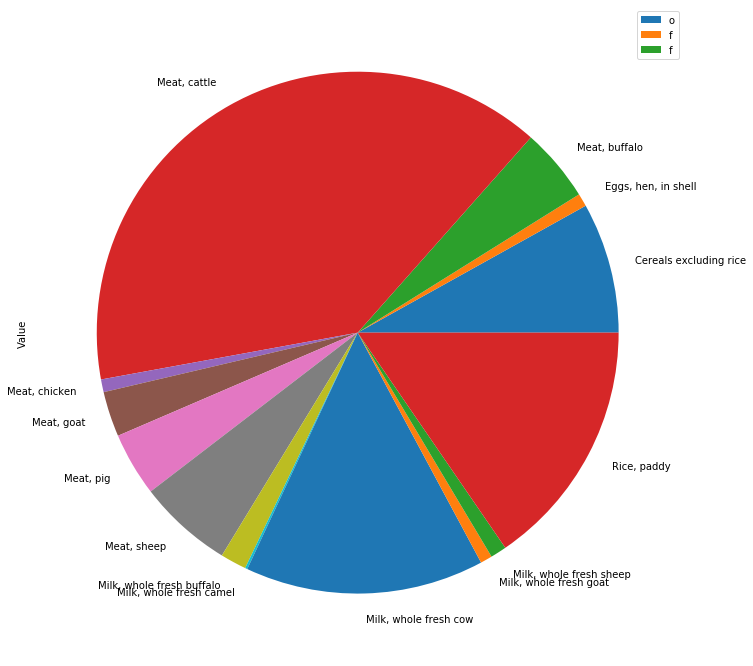

In [22]:
fig, ax = plt.subplots(figsize=(12, 12))
world_net_emissions = emissions_df[(emissions_df.Element == 'Emissions (CO2eq)') & (emissions_df.Area == 'World')]
world_net_emissions[['Item', 'Value']].groupby('Item').agg('sum').plot.pie(y='Value', ax=ax)
ax.legend('off')

In [23]:
food_paths = select_keywords_related_files(data_path, key_words=['Food'])
food_paths

[]

In [24]:
fao_paths = select_keywords_related_files(data_path, key_words=['fao'])
fao_paths

['data/fao_data_land_data.csv.zip',
 'data/fao_data_fertilizers_data.csv.zip',
 'data/fao_data_land_data.zip',
 'data/fao_data_crops_data.zip',
 'data/fao_data_fertilizers_data.zip',
 'data/fao_data_crops_data.csv.zip']

In [26]:
fao_crops_df = pd.read_csv(fao_paths[3], encoding='latin-1')
fao_crops_df.element.unique()

array(['Area Harvested', 'Yield', 'Production Quantity', nan, 'Seed',
       'Gross Production 1999-2001 (1000 I$)',
       'Net Production 1999-2001 (1000 I$)', 'Gross PIN (base 1999-2001)',
       'Grs per capita PIN (base 1999-2001)', 'Net PIN (base 1999-2001)',
       'Net per capita PIN (base 1999-2001)'], dtype=object)

In [28]:
fao_fertilizer_df = pd.read_csv(fao_paths[1], encoding='latin-1')
world_animals = fao_fertilizer_df[fao_fertilizer_df.country_or_area == 'World +'][['value', 'category']]
world_animals.groupby('category', as_index=False).agg('sum').sort_values(by='value').plot.bar(x='category', y='value')

ValueError: ('Multiple files found in compressed zip file %s', "['fao_data_fertilizers_data.csv', '__MACOSX/._fao_data_fertilizers_data.csv']")

In [15]:
rice_prod_df = fao_crops_df[(fao_crops_df.category == 'rice_paddy') & (fao_crops_df.element == 'Production Quantity')]
rice_area_df = fao_crops_df[(fao_crops_df.category == 'rice_paddy') & (fao_crops_df.element == 'Area Harvested')]

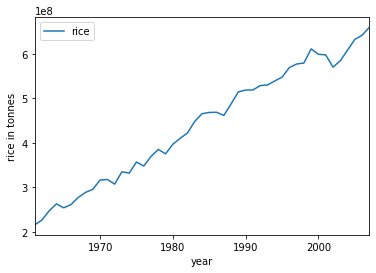

In [16]:
rice_prod_df[rice_prod_df.country_or_area == 'World +'][['year', 'value']].groupby('year').\
    agg(rice=('value', 'sum')).plot(label='rice')
plt.ylabel('rice in tonnes')
plt.legend()

In [17]:
continents = ['Africa +', 'Asia +', 'Americas +', 'Europe +', 'Oceania +']

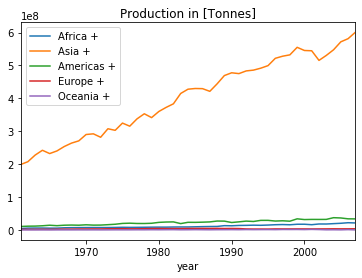

In [18]:
ax = plt.gca()
for continent in continents:
    rice_prod_df[rice_prod_df.country_or_area == continent].groupby('year').agg('sum').plot(ax=ax)
    ax.legend(continents)
    ax.set_title('Production in [Tonnes]')

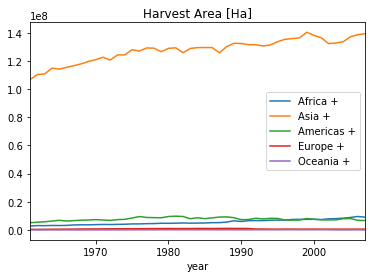

In [19]:
ax = plt.gca()
for continent in continents:
    rice_area_df[rice_area_df.country_or_area == continent].groupby('year').agg('sum').plot(ax=ax)
    ax.legend(continents)
    ax.set_title('Harvest Area [Ha]')

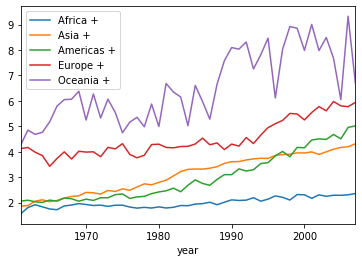

In [20]:
ax = plt.gca()
for continent in continents:
    efficiency_df = rice_prod_df[rice_prod_df.country_or_area == continent].groupby('year').agg('sum') / \
          rice_area_df[rice_area_df.country_or_area == continent].groupby('year').agg('sum')
    efficiency_df.plot(ax=ax)
    ax.legend(continents)

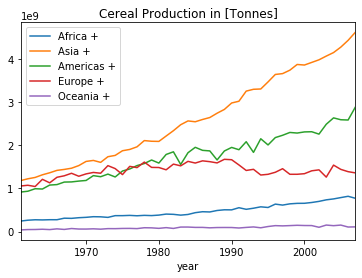

In [21]:
cereal_production_df = fao_crops_df[fao_crops_df.element == 'Production Quantity']
cereal_production_df = cereal_production_df[~cereal_production_df.category.str.contains('total')]
ax = plt.gca()
for continent in continents:
    cereal_production_df[cereal_production_df.country_or_area == continent].groupby('year').agg('sum').plot(ax=ax)
    ax.legend(continents)
    ax.set_title('Cereal Production in [Tonnes]')

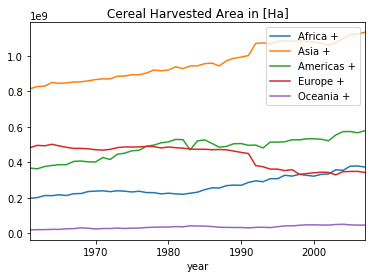

In [22]:
cereal_area_df = fao_crops_df[fao_crops_df.element == 'Area Harvested']
cereal_area_df = cereal_area_df[~cereal_area_df.category.str.contains('total')]
ax = plt.gca()
for continent in continents:
    cereal_area_df[cereal_area_df.country_or_area == continent].groupby('year').agg('sum').plot(ax=ax)
    ax.legend(continents)
    ax.set_title('Cereal Harvested Area in [Ha]')

<Figure size 864x864 with 0 Axes>

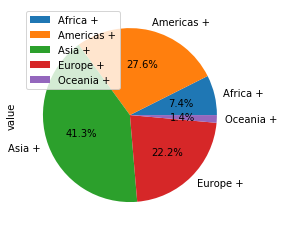

In [23]:
fig = plt.figure(figsize=(12, 12))
continent_production = cereal_production_df[(cereal_production_df.country_or_area.isin(continents)) & \
                                      (~cereal_production_df.category.str.contains('total'))]
continent_production[['country_or_area', 'value']].groupby('country_or_area').agg('sum')\
    .plot.pie(y='value', autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.show()

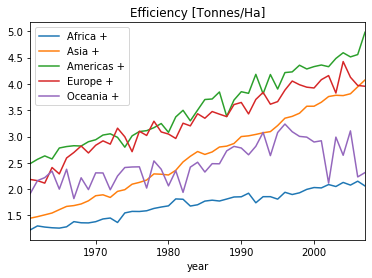

In [24]:
ax = plt.gca()
for continent in continents:
    efficiency_df = cereal_production_df[cereal_production_df.country_or_area == continent].groupby('year').agg('sum') / \
          cereal_area_df[cereal_area_df.country_or_area == continent].groupby('year').agg('sum')
    efficiency_df.plot(ax=ax)
    ax.legend(continents)
    ax.set_title('Efficiency [Tonnes/Ha]')

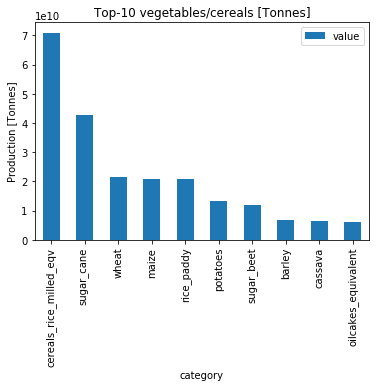

In [25]:
worlds_top_production = fao_crops_df[(fao_crops_df.country_or_area == 'World +') & \
                                     (fao_crops_df.element == 'Production Quantity')][['value', 'category']]
worlds_top_production = worlds_top_production[~worlds_top_production.category.str.contains('total')]
worlds_top_production = worlds_top_production.groupby('category', as_index=False).agg('sum').\
    sort_values(by='value', ascending=False).head(10)
worlds_top_production.plot.bar(x='category', y='value')
plt.title('Top-10 vegetables/cereals [Tonnes]')
plt.ylabel('Production [Tonnes]')
plt.show()

In [ ]:
list(filter(lambda x: 'total' in x, fao_crops_df.category.unique()))

In [ ]:
fao_crops_df.year.unique()